In [1]:
import pandas as pd
import numpy as np

In [2]:
bike_data=pd.read_csv('bike_usage_0.csv',encoding='ANSI')
population=pd.read_csv('population_by_Gu.txt',sep='\t')
weather=pd.read_csv('weather.csv')
stations=pd.read_csv('stations.csv')

In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36595 entries, 0 to 36594
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_out         36595 non-null  object
 1   Time_out         36595 non-null  int64 
 2   Station_no_out   36595 non-null  int64 
 3   Station_out      36595 non-null  object
 4   Membership_type  36595 non-null  object
 5   Gender           18262 non-null  object
 6   Age_Group        36595 non-null  object
 7   Momentum         36595 non-null  object
 8   Station_no_in    36595 non-null  int64 
 9   Station_in       36595 non-null  object
 10  Date_in          36595 non-null  object
 11  Bike_no          36595 non-null  object
 12  Carbon_amount    36595 non-null  object
 13  Distance         36595 non-null  int64 
 14  Duration         36595 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 4.2+ MB


In [4]:
bike_data.loc[bike_data.Gender.isnull(),'Gender']='U' #U로 대체하기

In [5]:
bike_data.Gender.value_counts()

U    18333
M    11025
F     7219
m       14
f        4
Name: Gender, dtype: int64

In [6]:
bike_data[bike_data.Momentum == '\\N']

,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,Date_in,Bike_no,Carbon_amount,Distance,Duration
3347,2019-10-03,14,113,113. 홍대입구역 2번출구 앞,정기권,F,30대,\N,113,홍대입구역 2번출구 앞,2019-10-03 오후 7:56:30,SPB-19656,\N,0,2
14547,2019-10-04,10,203,203. 국회의사당역 3번출구 옆,정기권,F,70대~,\N,214,금융감독원 앞,2019-10-04 오전 8:41:49,SPB-14566,\N,0,5
15697,2019-10-04,12,211,211. 여의도역 4번출구 옆,정기권,M,20대,\N,217,NH농협은행 앞,2019-10-04 오전 10:00:22,SPB-05742,\N,0,5
20683,2019-10-04,19,238,238. 제2구민체육센타 앞,정기권,U,20대,\N,238,제2구민체육센타 앞,2019-10-04 오후 8:34:07,SPB-18370,\N,0,3
25700,2019-10-05,3,2259,2259. 잠원역 3번-4번 출구사이,정기권,U,40대,\N,2217,아크로리버뷰 부지 앞,2019-10-05 오후 9:23:46,SPB-03337,\N,0,7
27995,2019-10-05,11,274,274. 영등포역지하쇼핑센타 5번출구,정기권,U,40대,\N,279,영등포 푸르지오 아파트,2019-10-05 오후 10:03:10,SPB-15669,\N,0,10
30112,2019-10-05,14,437,437. 대흥역 1번출구,정기권,M,30대,\N,135,명물길 원형무대 앞,2019-10-05 오후 10:55:50,SPB-17475,\N,0,10
32978,2019-10-05,18,274,274. 영등포역지하쇼핑센타 5번출구,정기권,F,20대,\N,274,영등포역지하쇼핑센타 5번출구,2019-10-05 오후 3:46:34,SPB-16977,\N,0,7
34459,2019-10-05,20,146,146. 마포역 2번출구 뒤,정기권,F,20대,\N,109,제일빌딩 앞,2019-10-05 오후 8:21:07,SPB-18232,\N,0,19


In [7]:
bike_data.loc[bike_data.Momentum == '\\N','Momentum']=np.nan

In [8]:
bike_data.dropna(inplace=True)

In [9]:
bike_data[['Momentum','Carbon_amount']]=bike_data[['Momentum','Carbon_amount']].astype(float)

In [10]:
#Tukey방법이용
def outliers_iqr(data):
    q1,q3=np.percentile(data,[25,75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    return np.where((data > upper_bound)|(data<lower_bound))

outliers=outliers_iqr(bike_data.Distance)
bike_data.iloc[outliers]

,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,Date_in,Bike_no,Carbon_amount,Distance,Duration
31,2019-10-03,0,403,403. 부엉이공원 앞,정기권,M,40대,483.28,194,증산교 앞,2019-10-03 오전 2:03:13,SPB-06112,3.15,13560,67
97,2019-10-03,1,181,181. 망원초록길 입구,일일권,U,30대,777.43,1328,월곡역 3번출구,2019-10-03 오전 3:29:29,SPB-16451,5.69,24540,107
118,2019-10-03,2,2222,2222.사당역 12번출구 뒤,정기권,U,30대,549.60,1124,발산역 6번출구옆(다이소앞),2019-10-03 오전 4:03:32,SPB-24365,4.74,20410,81
163,2019-10-03,2,903,903. 은평뉴타운 아이파크,정기권,M,50대,319.57,184,SK망원동주유소 건너편,2019-10-03 오전 5:11:40,SPB-14422,3.12,13450,131
247,2019-10-03,3,2505,2505. 우성아파트사거리 (기업은행앞),일일권,U,30대,373.51,1201,가락시장역 3번 출구,2019-10-03 오전 4:49:48,SPB-23456,2.74,11790,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36564,2019-10-05,23,933,933. LG서비스 역촌점,일일권,F,20대,220.41,418,월드컵경기장역 3번출구 옆,2019-10-06 오전 12:29:02,SPB-07222,2.81,12100,87
36569,2019-10-05,23,148,148. 용강동 주민센터 앞,일일권,F,30대,335.94,146,마포역 2번출구 뒤,2019-10-06 오전 1:05:07,SPB-21082,3.64,15710,85
36575,2019-10-05,23,437,437. 대흥역 1번출구,일일권,M,20대,346.10,437,대흥역 1번출구,2019-10-06 오전 1:26:17,SPB-25415,2.67,11500,109
36581,2019-10-05,23,641,641. 용두역 4번출구,일일권,M,20대,303.22,583,청계천 생태교실 앞,2019-10-06 오전 12:09:02,SPB-19379,2.73,11780,57


In [11]:
#데이터 결합 station과 bike_data
bike_data2=pd.merge(bike_data,stations,left_on='Station_no_out',right_on='ID')
bike_data2

,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,...,Distance,Duration,Gu,ID,Station,Address,Latitude,Longitude,Date,No_of_Racks
0,2019-10-03,0,129,129. 신촌역(2호선) 6번출구 옆,정기권,U,~10대,28.27,122,신성기사식당 앞,...,1050,5,마포구,129,129. 신촌역(2호선) 6번출구 옆,서울특별시 마포구 신촌로 106,37.555054,126.937569,2015-09-07 10:37,15
1,2019-10-03,4,129,129. 신촌역(2호선) 6번출구 옆,정기권,M,20대,0.00,126,서강대 후문 옆,...,0,4,마포구,129,129. 신촌역(2호선) 6번출구 옆,서울특별시 마포구 신촌로 106,37.555054,126.937569,2015-09-07 10:37,15
2,2019-10-03,10,129,129. 신촌역(2호선) 6번출구 옆,정기권,F,20대,14.41,125,서강대 남문 옆,...,560,3,마포구,129,129. 신촌역(2호선) 6번출구 옆,서울특별시 마포구 신촌로 106,37.555054,126.937569,2015-09-07 10:37,15
3,2019-10-03,12,129,129. 신촌역(2호선) 6번출구 옆,정기권,U,20대,27.75,125,서강대 남문 옆,...,960,62,마포구,129,129. 신촌역(2호선) 6번출구 옆,서울특별시 마포구 신촌로 106,37.555054,126.937569,2015-09-07 10:37,15
4,2019-10-03,13,129,129. 신촌역(2호선) 6번출구 옆,정기권,U,30대,25.26,118,광흥창역 2번출구 앞,...,1160,10,마포구,129,129. 신촌역(2호선) 6번출구 옆,서울특별시 마포구 신촌로 106,37.555054,126.937569,2015-09-07 10:37,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36581,2019-10-05,21,124,124. 서강대 정문 건너편,정기권,M,30대,4.75,121,마포소방서 앞,...,200,3,마포구,124,124. 서강대 정문 건너편,서울특별시 마포구 서강로16길 72,37.551140,126.936989,2015-09-07 10:33,20
36582,2019-10-05,21,124,124. 서강대 정문 건너편,정기권,M,40대,27.60,126,서강대 후문 옆,...,820,5,마포구,124,124. 서강대 정문 건너편,서울특별시 마포구 서강로16길 72,37.551140,126.936989,2015-09-07 10:33,20
36583,2019-10-05,22,124,124. 서강대 정문 건너편,정기권,M,40대,83.22,3102,연희삼거리,...,2840,11,마포구,124,124. 서강대 정문 건너편,서울특별시 마포구 서강로16길 72,37.551140,126.936989,2015-09-07 10:33,20
36584,2019-10-05,22,124,124. 서강대 정문 건너편,일일권,F,30대,33.32,124,서강대 정문 건너편,...,1870,27,마포구,124,124. 서강대 정문 건너편,서울특별시 마포구 서강로16길 72,37.551140,126.936989,2015-09-07 10:33,20


# 시각화

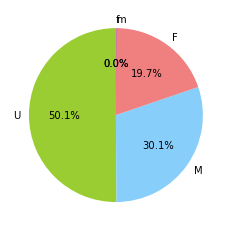

In [12]:
#시각화 - pie
import matplotlib.pyplot as plt
import numpy as np

labels = bike_data2.Gender.unique()
sizes = bike_data2.Gender.value_counts()
colors = ['yellowgreen','lightskyblue','lightcoral','blue','coral']
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%',startangle = 90)
plt.show()

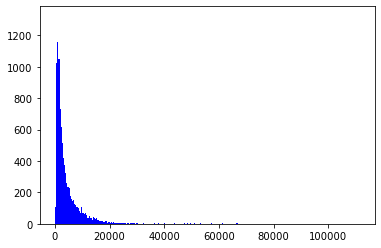

In [13]:
#시각화 - histogram
#plt.hist(bike_data2.Distance, color='blue')
plt.hist(bike_data2.Distance, color='blue',bins=1000)
plt.show()
#값들이 모두 왼쪽으로 쏠림

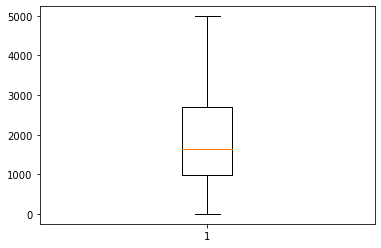

In [14]:
#시각화 - 박스
#plt.boxplot(bike_data2.Distance)
#plt.show()
#이상값이 많고 , 값의 차이가 큼. 따라서 아래와 같은 코드 실행(5000이 넘는 수 제거)
under_5000 = bike_data2[bike_data2.Distance < 5000]
plt.boxplot(under_5000.Distance)
plt.show()

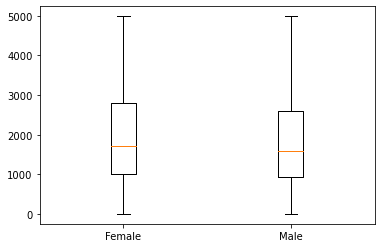

In [15]:
#성별로 나누어서 보기
under_5000 = bike_data2[bike_data2.Distance < 5000]
plt.boxplot([under_5000.Distance[under_5000.Gender=='F'],under_5000.Distance[under_5000.Gender=='M']])
plt.xticks([1,2],['Female','Male'])
plt.show()

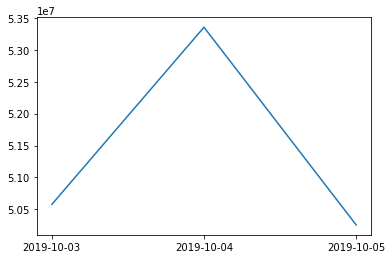

In [16]:
#시각화 - 선
plt.plot(bike_data['Distance'].groupby(bike_data['Date_out']).sum())
plt.show()
#3일간의 대여 실적만 포함 => 그래프가 너무 단순

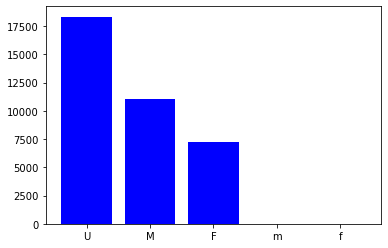

In [17]:
#시각화 - 막대그래프(1)
plt.bar(labels,height=sizes,color='blue')
plt.show()

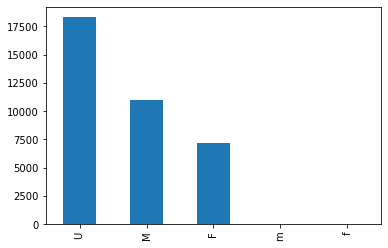

In [18]:
#시각화 - 막대그래프(2)
bike_data2['Gender'].value_counts().plot(kind='bar')
plt.show()

# 데이터 전처리

In [19]:
bike_data2.Gender.value_counts()

U    18330
M    11023
F     7215
m       14
f        4
Name: Gender, dtype: int64

In [20]:
#소문자는 대문자로 바꿔주기(1)
#bike_data2[bike_data2.Gender == 'f']
#bike_data2.loc[bike_data2.Gender=='f','Gender']
bike_data2.loc[bike_data2.Gender=='f','Gender'] = 'F'

In [21]:
#소문자는 대문자로 바꿔주기(2)
#bike_data2[bike_data2.Gender == 'm']
#bike_data2.loc[bike_data2.Gender=='m','Gender']
bike_data2.loc[bike_data2.Gender=='m','Gender'] = 'M'
bike_data2.Gender.value_counts()

U    18330
M    11037
F     7219
Name: Gender, dtype: int64

In [22]:
bike_data2[bike_data2.Distance == 0]
#1005행

,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,...,Distance,Duration,Gu,ID,Station,Address,Latitude,Longitude,Date,No_of_Racks
1,2019-10-03,4,129,129. 신촌역(2호선) 6번출구 옆,정기권,M,20대,0.0,126,서강대 후문 옆,...,0,4,마포구,129,129. 신촌역(2호선) 6번출구 옆,서울특별시 마포구 신촌로 106,37.555054,126.937569,2015-09-07 10:37,15
21,2019-10-03,18,129,129. 신촌역(2호선) 6번출구 옆,정기권,M,30대,0.0,129,신촌역(2호선) 6번출구 옆,...,0,2,마포구,129,129. 신촌역(2호선) 6번출구 옆,서울특별시 마포구 신촌로 106,37.555054,126.937569,2015-09-07 10:37,15
27,2019-10-03,20,129,129. 신촌역(2호선) 6번출구 옆,정기권,M,20대,0.0,126,서강대 후문 옆,...,0,4,마포구,129,129. 신촌역(2호선) 6번출구 옆,서울특별시 마포구 신촌로 106,37.555054,126.937569,2015-09-07 10:37,15
79,2019-10-04,21,129,129. 신촌역(2호선) 6번출구 옆,일일권,U,~10대,0.0,437,대흥역 1번출구,...,0,26,마포구,129,129. 신촌역(2호선) 6번출구 옆,서울특별시 마포구 신촌로 106,37.555054,126.937569,2015-09-07 10:37,15
165,2019-10-04,7,150,150. 서강대역 2번출구 앞,정기권,U,30대,0.0,143,공덕역 2번출구,...,0,10,마포구,150,150. 서강대역 2번출구 앞,서울특별시 마포구 노고산동 112-13,37.552956,126.934341,2016-06-29 12:00,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36378,2019-10-05,15,2201,2201. 본마을 정류소 앞,일일권,U,30대,0.0,2351,청소년수련관(수영장)앞,...,0,63,서초구,2201,2201. 본마을 정류소 앞,서울특별시 서초구 본마을2길 2,37.453281,127.051483,2017-06-01 9:57,20
36426,2019-10-04,18,2257,2257. 하나로클럽 양재점 맞은편,정기권,U,40대,0.0,2618,삼전역 1번출구,...,0,40,서초구,2257,2257. 하나로클럽 양재점 맞은편,서울특별시 서초구 청계산로 10,37.462688,127.046112,2017-06-01 10:48,10
36473,2019-10-04,21,2249,2249. 우솔초등학교 맞은편,일일권,M,40대,0.0,2335,3호선 매봉역 3번출구앞,...,0,24,서초구,2249,2249. 우솔초등학교 맞은편,서울특별시 서초구 양재대로2길 74,37.456234,127.019348,2017-06-22 13:56,10
36497,2019-10-05,20,2510,2510. JW타워,정기권,U,40대,0.0,2249,우솔초등학교 맞은편,...,0,20,서초구,2510,JW타워,서초구 서초동 1748-45,37.483040,127.021461,2019.03.26,8


In [23]:
#이동거리가 0인 경우, 최대 대여 시간 탐색
bike_data2.loc[bike_data2.Distance == 0,'Duration'].max() #최댓값 = 214
#214분 동안 대여했는데 이동거리가 0이라는건 말이 X => 따라서 제외해주기
bike_data2 = bike_data2[bike_data2.Distance != 0]
bike_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35581 entries, 0 to 36585
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date_out         35581 non-null  object 
 1   Time_out         35581 non-null  int64  
 2   Station_no_out   35581 non-null  int64  
 3   Station_out      35581 non-null  object 
 4   Membership_type  35581 non-null  object 
 5   Gender           35581 non-null  object 
 6   Age_Group        35581 non-null  object 
 7   Momentum         35581 non-null  float64
 8   Station_no_in    35581 non-null  int64  
 9   Station_in       35581 non-null  object 
 10  Date_in          35581 non-null  object 
 11  Bike_no          35581 non-null  object 
 12  Carbon_amount    35581 non-null  float64
 13  Distance         35581 non-null  int64  
 14  Duration         35581 non-null  int64  
 15  Gu               35581 non-null  object 
 16  ID               35581 non-null  int64  
 17  Station     

In [24]:
#피벗테이블 생성 [반대 = melt]
bike_pivot = pd.pivot_table(bike_data2, index='Age_Group',columns='Membership_type',values = 'Distance',aggfunc=np.sum)
bike_pivot = bike_pivot.reset_index()
pd.melt(bike_pivot,id_vars='Age_Group',value_vars=['단체권','일일권','일일권(비회원)','정기권'],var_name='Membership_type',value_name='Total_Dist')

,Age_Group,Membership_type,Total_Dist
0,20대,단체권,371870.0
1,30대,단체권,92580.0
2,40대,단체권,177820.0
3,50대,단체권,39560.0
4,60대,단체권,NaN
5,70대~,단체권,2450.0
6,~10대,단체권,50280.0
7,20대,일일권,24609660.0
8,30대,일일권,15251200.0
9,40대,일일권,6991400.0


# 가설검정과 t-검정

In [25]:
bike_data2.Gu.value_counts()

영등포구    10290
마포구      9345
서초구      6543
동대문구     4797
은평구      4606
Name: Gu, dtype: int64

In [26]:
#영등포구 마포구만 따로 만들기 = 두 구의 공유자전거 대여시 이동거리의 평균비교하기위해
y_gu=bike_data2[bike_data2.Gu=='영등포구']
m_gu=bike_data2[bike_data2.Gu=='마포구']

In [27]:
from scipy import stats

stats.levene(y_gu.Distance,m_gu.Distance)
#검정통계량=3.56 p-value=0.059
#등분산이다 (0.05보다 크기때문에)
#levene등분산 사용

LeveneResult(statistic=3.5647234607192013, pvalue=0.05903430224682354)

In [28]:
np.mean(y_gu.Distance)

4190.278911564626

In [29]:
np.mean(m_gu.Distance)

4514.426966292135

In [30]:
stats.ttest_ind(y_gu.Distance,m_gu.Distance,equal_var=True)
#0.05보다 작음, 귀무가설 기각
#두 구의 이동거리 평균은 같지 않다.

Ttest_indResult(statistic=-4.002195758414915, pvalue=6.298774059911862e-05)

# 분산분석

In [31]:
s_gu=bike_data2[bike_data2.Gu=='서초구']
d_gu=bike_data2[bike_data2.Gu=='동대문구']
e_gu=bike_data2[bike_data2.Gu=='은평구']

In [32]:
stats.bartlett(y_gu.Distance,m_gu.Distance,s_gu.Distance,d_gu.Distance,e_gu.Distance)
#p-value<0.05 따라서 모든그룹이 등분산은 아니다
#귀무가설 기각
#모든 그룹이 같은 분산을 가지고 있지 않다

BartlettResult(statistic=405.99591324805436, pvalue=1.4084240027307602e-86)

In [33]:
#등분산으로 가정
#onewayanova
stats.f_oneway(y_gu.Distance,m_gu.Distance,s_gu.Distance,d_gu.Distance,e_gu.Distance)
# <0.05 귀무가설 기각 (가설:5개 구의 이동거리 평균은 모두 같다)

F_onewayResult(statistic=37.75546101206967, pvalue=1.4366160740892166e-31)

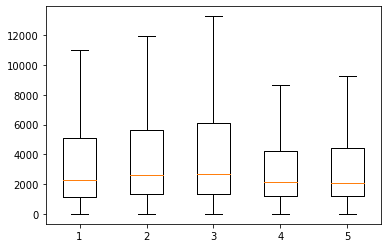

In [34]:
plot_data=[y_gu.Distance,m_gu.Distance,s_gu.Distance,d_gu.Distance,e_gu.Distance]
plt.boxplot(plot_data,showfliers=False)
plt.show()

In [35]:
#Tukey HSD방법 사용
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd=pairwise_tukeyhsd(bike_data2.Distance,bike_data2.Gu)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
동대문구,마포구,793.049,0.001,515.079,1071.019,True
동대문구,서초구,1210.5524,0.001,913.0775,1508.0272,True
동대문구,영등포구,468.901,0.001,195.2948,742.5072,True
동대문구,은평구,351.3685,0.0249,28.5165,674.2204,True
마포구,서초구,417.5033,0.001,165.2287,669.778,True
마포구,영등포구,-324.1481,0.001,-547.7807,-100.5154,True
마포구,은평구,-441.6805,0.001,-723.4333,-159.9278,True
서초구,영등포구,-741.6514,0.001,-989.1095,-494.1933,True
서초구,은평구,-859.1839,0.001,-1160.1964,-558.1714,True
영등포구,은평구,-117.5325,0.7495,-394.9809,159.9159,False


# 카이제곱 검정(Chi-Suqare Test)

In [36]:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(bike_data2.Age_Group,bike_data2.Membership_type)
result = chi2_contingency(crosstab)
print('Chi2 Statistic : {}, p-value : {}'.format(result[0],result[1]))

Chi2 Statistic : 1383.2239098895247, p-value : 5.690745840063902e-283


# 상관분석

In [37]:
dist_by_gu=pd.pivot_table(bike_data2,index='Gu',values='Distance',aggfunc=len)
dist_by_gu

,Distance
Gu,
동대문구,4797
마포구,9345
서초구,6543
영등포구,10290
은평구,4606


In [38]:
by_gu=pd.merge(dist_by_gu,population,on='Gu')
by_gu

,Gu,Distance,Family,Population,Male,Female,D_Total,D_Male,D_Female,F_Total,F_Male,F_Female,per_Family,over_65
0,동대문구,4797,164191,363023,178490,184533,346194,172113,174081,16829,6377,10452,2.11,59350
1,마포구,9345,175023,385925,181303,204622,374035,176891,197144,11890,4412,7478,2.14,52429
2,서초구,6543,173199,435107,208181,226926,430826,206039,224787,4281,2142,2139,2.49,57136
3,영등포구,10290,174806,400986,200986,200000,367678,182438,185240,33308,18548,14760,2.10,57872
4,은평구,4606,207681,484546,233360,251186,480032,231528,248504,4514,1832,2682,2.31,80738


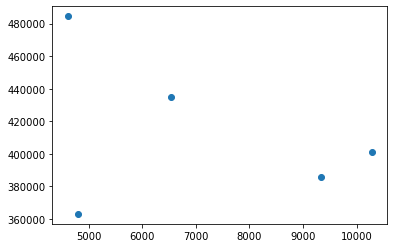

In [39]:
plt.scatter(by_gu.Distance,by_gu.Population)
plt.show()

In [40]:
stats.pearsonr(by_gu.Distance,by_gu.Population)
#(상관관계, p-value)

(-0.3547744402265295, 0.5579504252953678)

In [41]:
by_gu=pd.merge(dist_by_gu,population,on='Gu')[['Gu','Distance','Population']]
by_gu.corr()

,Distance,Population
Distance,1.000000,-0.354774
Population,-0.354774,1.000000


# 회귀분석_수치형

In [42]:
weather

,date_old,date,time,temp,cum_precipitation,humidity,insolation,sunshine,wind,wind_direction,sea_lvl_pressure,pressure
0,2019-10-03 오전 12:00:00,2019-10-03,12,20.0,23.2,94.1,3.40,0,5.5,351.7,1004.1,994.2
1,2019-10-03 오전 12:01:00,2019-10-03,12,20.1,0.0,94.1,0.00,0,3.7,348.6,1004.1,994.2
2,2019-10-03 오전 12:02:00,2019-10-03,12,20.0,0.0,94.1,0.00,0,3.6,346.4,1004.1,994.2
3,2019-10-03 오전 12:03:00,2019-10-03,12,20.0,0.0,94.1,0.00,0,3.1,349.1,1004.1,994.2
4,2019-10-03 오전 12:04:00,2019-10-03,12,20.0,0.0,94.0,0.00,0,3.4,335.9,1004.1,994.2
...,...,...,...,...,...,...,...,...,...,...,...,...
4315,2019-10-05 오후 11:55:00,2019-10-05,23,14.8,0.6,63.6,8.24,8400,3.2,350.9,1021.3,1011.0
4316,2019-10-05 오후 11:56:00,2019-10-05,23,14.8,0.6,63.5,8.24,8400,2.9,354.3,1021.3,1011.0
4317,2019-10-05 오후 11:57:00,2019-10-05,23,14.8,0.6,63.7,8.24,8400,3.1,3.9,1021.3,1011.0
4318,2019-10-05 오후 11:58:00,2019-10-05,23,14.7,0.6,63.9,8.24,8400,2.3,10.0,1021.2,1011.0


In [43]:
new_weather=pd.pivot_table(weather,index=['date','time'],
                           values=['temp','cum_precipitation','humidity','insolation','sunshine','wind','wind_direction','sea_lvl_pressure','pressure'],
                          aggfunc=np.mean)
new_weather

cum_precipitation   humidity  insolation     pressure  \
date       time                                                          
2019-10-03 1              2.361667  93.846667      0.0000   993.010000   
           2              3.353333  93.453333      0.0000   992.668333   
           3              3.930000  91.686667      0.0000   992.253333   
           4              4.423333  93.061667      0.0000   992.316667   
           5              4.500000  95.028333      0.0000   992.835000   
...                            ...        ...         ...          ...   
2019-10-05 20             0.600000  61.381667      8.2400  1009.146667   
           21             0.600000  62.598333      8.2400  1009.773333   
           22             0.600000  63.560000      8.2400  1010.376667   
           23             0.600000  63.426667      8.2400  1010.846667   
           24             0.600000  69.291667      3.6575  1005.155000   

                 sea_lvl_pressure  sunshine       temp      wind  \
date       time                                                    
2019-10-03 1          1002.910000         0  20.016667  3.290000   
           2          1002.568333         0  19.908333  3.056667   
           3          1002.153333         0  19.923333  2.125000   
           4          1002.216667         0  19.928333  1.931667   
           5          1002.735000         0  19.871667  2.886667   
...                           ...       ...        ...       ...   
2019-10-05 20         1019.273333      8400  16.610000  3.631667   
           21         1019.973333      8400  15.988333  3.686667   
           22         1020.576667      8400  15.436667  3.680000   
           23         1021.085000      8400  14.986667  3.401667   
           24         1015.140000      1703  20.473333  2.841667   

                 wind_direction  
date       time                  
2019-10-03 1         178.788333  
           2         333.400000  
           3         330.110000  
           4         251.535000  
           5         236.116667  
...                         ...  
2019-10-05 20        125.785000  
           21        225.700000  
           22        225.253333  
           23        179.688333  
           24        248.531667  

[72 rows x 9 columns]

In [44]:
new_weather=new_weather.reset_index()

In [45]:
new_weather

,date,time,cum_precipitation,humidity,insolation,pressure,sea_lvl_pressure,sunshine,temp,wind,wind_direction
0,2019-10-03,1,2.361667,93.846667,0.0000,993.010000,1002.910000,0,20.016667,3.290000,178.788333
1,2019-10-03,2,3.353333,93.453333,0.0000,992.668333,1002.568333,0,19.908333,3.056667,333.400000
2,2019-10-03,3,3.930000,91.686667,0.0000,992.253333,1002.153333,0,19.923333,2.125000,330.110000
3,2019-10-03,4,4.423333,93.061667,0.0000,992.316667,1002.216667,0,19.928333,1.931667,251.535000
4,2019-10-03,5,4.500000,95.028333,0.0000,992.835000,1002.735000,0,19.871667,2.886667,236.116667
...,...,...,...,...,...,...,...,...,...,...,...
67,2019-10-05,20,0.600000,61.381667,8.2400,1009.146667,1019.273333,8400,16.610000,3.631667,125.785000
68,2019-10-05,21,0.600000,62.598333,8.2400,1009.773333,1019.973333,8400,15.988333,3.686667,225.700000
69,2019-10-05,22,0.600000,63.560000,8.2400,1010.376667,1020.576667,8400,15.436667,3.680000,225.253333
70,2019-10-05,23,0.600000,63.426667,8.2400,1010.846667,1021.085000,8400,14.986667,3.401667,179.688333


In [46]:
new_bike=pd.pivot_table(bike_data2,index=['Date_out','Time_out'],
                        values=['Distance'],aggfunc=len)
new_bike=new_bike.reset_index()
new_bike

,Date_out,Time_out,Distance
0,2019-10-03,0,40
1,2019-10-03,1,64
2,2019-10-03,2,73
3,2019-10-03,3,78
4,2019-10-03,4,57
...,...,...,...
67,2019-10-05,19,648
68,2019-10-05,20,619
69,2019-10-05,21,664
70,2019-10-05,22,585


In [47]:
new_bike.rename(columns={'Distance':'Count'},inplace=True)
new_bike.columns

Index(['Date_out', 'Time_out', 'Count'], dtype='object')

In [48]:
bike_weather=pd.merge(new_bike,new_weather,
                      left_on=['Date_out','Time_out'],
                      right_on=['date','time'])
bike_weather

,Date_out,Time_out,Count,date,time,cum_precipitation,humidity,insolation,pressure,sea_lvl_pressure,sunshine,temp,wind,wind_direction
0,2019-10-03,1,64,2019-10-03,1,2.361667,93.846667,0.00,993.010000,1002.910000,0,20.016667,3.290000,178.788333
1,2019-10-03,2,73,2019-10-03,2,3.353333,93.453333,0.00,992.668333,1002.568333,0,19.908333,3.056667,333.400000
2,2019-10-03,3,78,2019-10-03,3,3.930000,91.686667,0.00,992.253333,1002.153333,0,19.923333,2.125000,330.110000
3,2019-10-03,4,57,2019-10-03,4,4.423333,93.061667,0.00,992.316667,1002.216667,0,19.928333,1.931667,251.535000
4,2019-10-03,5,43,2019-10-03,5,4.500000,95.028333,0.00,992.835000,1002.735000,0,19.871667,2.886667,236.116667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2019-10-05,19,648,2019-10-05,19,0.600000,60.570000,8.24,1008.340000,1018.440000,8400,17.171667,4.085000,146.493333
65,2019-10-05,20,619,2019-10-05,20,0.600000,61.381667,8.24,1009.146667,1019.273333,8400,16.610000,3.631667,125.785000
66,2019-10-05,21,664,2019-10-05,21,0.600000,62.598333,8.24,1009.773333,1019.973333,8400,15.988333,3.686667,225.700000
67,2019-10-05,22,585,2019-10-05,22,0.600000,63.560000,8.24,1010.376667,1020.576667,8400,15.436667,3.680000,225.253333


In [49]:
slop,intercept,r_value,p_value,std_err=stats.linregress(bike_weather.temp,bike_weather.Count)
print("R_squared:%f"%r_value**2)

R_squared:0.192199


In [50]:
import statsmodels.api as sm

X0 = bike_weather.temp
X1 = sm.add_constant(X0)
y = bike_weather.Count
model = sm.OLS(y,X1)
result = model.fit()
print(result.summary())

#유의미함

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     15.94
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           0.000165
Time:                        02:48:37   Log-Likelihood:                -474.73
No. Observations:                  69   AIC:                             953.5
Df Residuals:                      67   BIC:                             957.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -320.1461    207.877     -1.540      0.1

# 다중회귀분석

In [51]:
from sklearn.model_selection import train_test_split

X = bike_weather[['cum_precipitation','humidity','temp','wind']]
y = bike_weather.Count
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [52]:
import statsmodels.api as sm

X1 = sm.add_constant(X_train)
model = sm.OLS(y_train,X1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     18.23
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           7.99e-09
Time:                        02:48:38   Log-Likelihood:                -312.08
No. Observations:                  48   AIC:                             634.2
Df Residuals:                      43   BIC:                             643.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1765.8805    406.04

In [53]:
X1 = sm.add_constant(X_test)
pred = result.predict(X1)
pred

8     359.689227
37    776.467633
40    596.610515
56    446.904312
23    398.884587
53    215.006054
9     468.031981
43    373.272545
68    662.458239
1     155.301651
60    600.559534
67    658.713630
42    399.725912
63    689.399962
24    351.858574
58    607.149355
59    650.659018
55    409.889723
29    371.885866
6     205.195444
61    543.214005
dtype: float64

In [54]:
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('MAPE:',np.mean(np.abs((y_test-pred)/y_test))*100)

MAE: 154.96781747396312
MSE: 40194.987815230634
RMSE: 200.48687691525006
MAPE: 37.74978631438906


In [55]:
bike_weather['Rain_YN']='N'
bike_weather.loc[bike_weather.cum_precipitation > 0, 'Rain_YN'] = 'Y'
bike_weather

,Date_out,Time_out,Count,date,time,cum_precipitation,humidity,insolation,pressure,sea_lvl_pressure,sunshine,temp,wind,wind_direction,Rain_YN
0,2019-10-03,1,64,2019-10-03,1,2.361667,93.846667,0.00,993.010000,1002.910000,0,20.016667,3.290000,178.788333,Y
1,2019-10-03,2,73,2019-10-03,2,3.353333,93.453333,0.00,992.668333,1002.568333,0,19.908333,3.056667,333.400000,Y
2,2019-10-03,3,78,2019-10-03,3,3.930000,91.686667,0.00,992.253333,1002.153333,0,19.923333,2.125000,330.110000,Y
3,2019-10-03,4,57,2019-10-03,4,4.423333,93.061667,0.00,992.316667,1002.216667,0,19.928333,1.931667,251.535000,Y
4,2019-10-03,5,43,2019-10-03,5,4.500000,95.028333,0.00,992.835000,1002.735000,0,19.871667,2.886667,236.116667,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2019-10-05,19,648,2019-10-05,19,0.600000,60.570000,8.24,1008.340000,1018.440000,8400,17.171667,4.085000,146.493333,Y
65,2019-10-05,20,619,2019-10-05,20,0.600000,61.381667,8.24,1009.146667,1019.273333,8400,16.610000,3.631667,125.785000,Y
66,2019-10-05,21,664,2019-10-05,21,0.600000,62.598333,8.24,1009.773333,1019.973333,8400,15.988333,3.686667,225.700000,Y
67,2019-10-05,22,585,2019-10-05,22,0.600000,63.560000,8.24,1010.376667,1020.576667,8400,15.436667,3.680000,225.253333,Y


In [56]:
#원핫인코딩
ohe = pd.get_dummies(bike_weather['Rain_YN'])
ohe

,N,Y
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
64,0,1
65,0,1
66,0,1
67,0,1


In [57]:
bike_weather = pd.concat([bike_weather,ohe],axis = 1, sort=False)
bike_weather

,Date_out,Time_out,Count,date,time,cum_precipitation,humidity,insolation,pressure,sea_lvl_pressure,sunshine,temp,wind,wind_direction,Rain_YN,N,Y
0,2019-10-03,1,64,2019-10-03,1,2.361667,93.846667,0.00,993.010000,1002.910000,0,20.016667,3.290000,178.788333,Y,0,1
1,2019-10-03,2,73,2019-10-03,2,3.353333,93.453333,0.00,992.668333,1002.568333,0,19.908333,3.056667,333.400000,Y,0,1
2,2019-10-03,3,78,2019-10-03,3,3.930000,91.686667,0.00,992.253333,1002.153333,0,19.923333,2.125000,330.110000,Y,0,1
3,2019-10-03,4,57,2019-10-03,4,4.423333,93.061667,0.00,992.316667,1002.216667,0,19.928333,1.931667,251.535000,Y,0,1
4,2019-10-03,5,43,2019-10-03,5,4.500000,95.028333,0.00,992.835000,1002.735000,0,19.871667,2.886667,236.116667,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2019-10-05,19,648,2019-10-05,19,0.600000,60.570000,8.24,1008.340000,1018.440000,8400,17.171667,4.085000,146.493333,Y,0,1
65,2019-10-05,20,619,2019-10-05,20,0.600000,61.381667,8.24,1009.146667,1019.273333,8400,16.610000,3.631667,125.785000,Y,0,1
66,2019-10-05,21,664,2019-10-05,21,0.600000,62.598333,8.24,1009.773333,1019.973333,8400,15.988333,3.686667,225.700000,Y,0,1
67,2019-10-05,22,585,2019-10-05,22,0.600000,63.560000,8.24,1010.376667,1020.576667,8400,15.436667,3.680000,225.253333,Y,0,1


In [58]:
from sklearn.model_selection import train_test_split

X = bike_weather[['humidity','temp','wind','N','Y']]
y = bike_weather.Count
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

import statsmodels.api as sm

X1 = sm.add_constant(X_train)
model = sm.OLS(y_train,X1)
result = model.fit()
print(result.summary())

X1 = sm.add_constant(X_test)
pred = result.predict(X1)

from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('MAPE:',np.mean(np.abs((y_test-pred)/y_test))*100)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     19.05
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           4.44e-09
Time:                        02:48:38   Log-Likelihood:                -311.41
No. Observations:                  48   AIC:                             632.8
Df Residuals:                      43   BIC:                             642.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1152.1179    259.635      4.437      0.0

# 로지스틱 회귀분석

In [59]:
bike_weather['over_500'] = 1
bike_weather.loc[bike_weather.Count < 500,'over_500'] = 0

In [60]:
bike_weather

,Date_out,Time_out,Count,date,time,cum_precipitation,humidity,insolation,pressure,sea_lvl_pressure,sunshine,temp,wind,wind_direction,Rain_YN,N,Y,over_500
0,2019-10-03,1,64,2019-10-03,1,2.361667,93.846667,0.00,993.010000,1002.910000,0,20.016667,3.290000,178.788333,Y,0,1,0
1,2019-10-03,2,73,2019-10-03,2,3.353333,93.453333,0.00,992.668333,1002.568333,0,19.908333,3.056667,333.400000,Y,0,1,0
2,2019-10-03,3,78,2019-10-03,3,3.930000,91.686667,0.00,992.253333,1002.153333,0,19.923333,2.125000,330.110000,Y,0,1,0
3,2019-10-03,4,57,2019-10-03,4,4.423333,93.061667,0.00,992.316667,1002.216667,0,19.928333,1.931667,251.535000,Y,0,1,0
4,2019-10-03,5,43,2019-10-03,5,4.500000,95.028333,0.00,992.835000,1002.735000,0,19.871667,2.886667,236.116667,Y,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2019-10-05,19,648,2019-10-05,19,0.600000,60.570000,8.24,1008.340000,1018.440000,8400,17.171667,4.085000,146.493333,Y,0,1,1
65,2019-10-05,20,619,2019-10-05,20,0.600000,61.381667,8.24,1009.146667,1019.273333,8400,16.610000,3.631667,125.785000,Y,0,1,1
66,2019-10-05,21,664,2019-10-05,21,0.600000,62.598333,8.24,1009.773333,1019.973333,8400,15.988333,3.686667,225.700000,Y,0,1,1
67,2019-10-05,22,585,2019-10-05,22,0.600000,63.560000,8.24,1010.376667,1020.576667,8400,15.436667,3.680000,225.253333,Y,0,1,1


In [61]:
from sklearn.model_selection import train_test_split

X = bike_weather[['cum_precipitation','humidity','temp','wind']]
y = bike_weather.over_500
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [62]:
import statsmodels.api as sm

X1 = sm.add_constant(X_train)
model = sm.OLS(y_train,X1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               over_500   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     9.412
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.48e-05
Time:                        02:48:38   Log-Likelihood:                -19.068
No. Observations:                  48   AIC:                             48.14
Df Residuals:                      43   BIC:                             57.49
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.7376      0.90

In [63]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
print('Train set 정확도:%.2f'%log_reg.score(X_train,y_train))
print('Test set 정확도:%.2f'%log_reg.score(X_test,y_test))

Train set 정확도:0.88
Test set 정확도:0.76


In [64]:
from sklearn.metrics import classification_report

y_pred = log_reg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.82      0.75      0.78        12

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.77      0.76      0.76        21



# 군집분석(K-means clustering)

In [65]:
from sklearn.preprocessing import MinMaxScaler

X = np.array(weather.humidity).reshape(-1,1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.97205589],
       [0.97205589],
       [0.97205589],
       ...,
       [0.36526946],
       [0.36926148],
       [0.37125749]])

In [66]:
n_bike = pd.pivot_table(bike_data2, index=['Gu','Date_out','Time_out'], 
                        values = 'Distance',aggfunc=len)
n_bike = n_bike.reset_index()
n_bike.rename(columns = {'Distance':'Count'}, inplace=True)
n_bike

,Gu,Date_out,Time_out,Count
0,동대문구,2019-10-03,0,6
1,동대문구,2019-10-03,1,7
2,동대문구,2019-10-03,2,6
3,동대문구,2019-10-03,3,9
4,동대문구,2019-10-03,4,5
...,...,...,...,...
355,은평구,2019-10-05,19,72
356,은평구,2019-10-05,20,63
357,은평구,2019-10-05,21,62
358,은평구,2019-10-05,22,63


In [67]:
n_bike2 = pd.pivot_table(n_bike, index='Gu',
                         columns='Time_out',
                         values='Count',
                         aggfunc=np.mean)
n_bike2 = n_bike2.reset_index()
n_bike2

Time_out,Gu,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,동대문구,47.000000,45.000000,37.333333,29.666667,15.333333,16.000000,23.666667,39.666667,61.666667,...,85.333333,84.666667,92.666667,106.666667,111.666667,99.666667,93.000000,93.333333,84.333333,83.000000
1,마포구,86.666667,70.000000,48.666667,38.666667,31.666667,27.333333,33.666667,68.666667,91.333333,...,160.333333,200.333333,195.333333,233.000000,243.666667,204.333333,199.333333,201.333333,158.333333,118.000000
2,서초구,49.000000,47.000000,33.666667,32.666667,18.666667,16.333333,26.333333,47.333333,77.333333,...,123.000000,135.000000,142.666667,175.000000,187.333333,148.000000,145.333333,131.666667,113.000000,80.333333
3,영등포구,86.333333,66.333333,49.333333,36.000000,26.333333,31.000000,53.333333,89.000000,127.333333,...,194.000000,207.333333,219.333333,249.666667,275.666667,221.333333,200.000000,216.333333,187.333333,139.333333
4,은평구,48.666667,42.000000,35.333333,23.333333,12.333333,17.666667,26.000000,45.000000,65.666667,...,85.333333,86.000000,91.000000,107.000000,97.333333,89.333333,93.666667,72.000000,79.333333,70.333333


In [68]:
from sklearn import cluster

X = n_bike2.iloc[0:5,1:25]
y = n_bike2.Gu

km2=cluster.KMeans(n_clusters=2).fit(X)
km3=cluster.KMeans(n_clusters=3).fit(X)
km4=cluster.KMeans(n_clusters=4).fit(X)

In [69]:
n_bike2['2_Cluster'] = km2.labels_
n_bike2['3_Cluster'] = km3.labels_
n_bike2['4_Cluster'] = km4.labels_
n_bike2[['Gu','2_Cluster','3_Cluster','4_Cluster']]

Time_out,Gu,2_Cluster,3_Cluster,4_Cluster
0,동대문구,0,0,1
1,마포구,1,1,0
2,서초구,0,2,2
3,영등포구,1,1,3
4,은평구,0,0,1
